In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
basics = pd.read_table('data/title.basics.tsv')
ratings = pd.read_table('data/title.ratings.tsv')

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [4]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1939
1,tt0000002,5.8,262
2,tt0000003,6.5,1763
3,tt0000004,5.6,177
4,tt0000005,6.2,2572


In [5]:
basics.set_index('tconst', inplace=True)
ratings.set_index('tconst', inplace=True)

In [6]:
print(basics.shape)
print(ratings.shape)

(9533824, 8)
(1267778, 2)


In [7]:
print(basics.join(ratings).shape)

(9533824, 10)


In [8]:
genres = set()

for gl in basics.genres.head(1000000).str.split(','):
    for g in gl:
        genres.add(g)
        
print(sorted(genres))

['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western', '\\N']


In [9]:
GENRE = 'Sci-Fi'

mask = basics.genres.str.contains(GENRE).fillna(False)
print(mask.sum())

105348


In [10]:
scifi_basics = basics.loc[mask]

In [11]:
scifi_basics.head()

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tconst,,,,,,,,
tt0000516,short,The Electric Hotel,El hotel eléctrico,0,1908,\N,8,"Animation,Fantasy,Sci-Fi"
tt0000534,short,The '?' Motorist,The '?' Motorist,0,1906,\N,3,"Comedy,Fantasy,Sci-Fi"
tt0000575,short,"20,000 Leagues Under the Sea",20000 lieues sous les mers,0,1907,\N,10,"Adventure,Fantasy,Sci-Fi"
tt0000757,short,She,She,0,1908,\N,\N,"Fantasy,Sci-Fi,Short"
tt0000790,short,The Battle in the Clouds,The Airship Destroyer,0,1909,\N,7,"Fantasy,Sci-Fi,Short"


In [12]:
scifi_basics = scifi_basics.join(ratings)
print(len(scifi_basics))

105348


In [13]:
scifi_basics

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,,,
tt0000516,short,The Electric Hotel,El hotel eléctrico,0,1908,\N,8,"Animation,Fantasy,Sci-Fi",6.6,1034.0
tt0000534,short,The '?' Motorist,The '?' Motorist,0,1906,\N,3,"Comedy,Fantasy,Sci-Fi",6.7,1180.0
tt0000575,short,"20,000 Leagues Under the Sea",20000 lieues sous les mers,0,1907,\N,10,"Adventure,Fantasy,Sci-Fi",5.7,513.0
tt0000757,short,She,She,0,1908,\N,\N,"Fantasy,Sci-Fi,Short",NaN,NaN
tt0000790,short,The Battle in the Clouds,The Airship Destroyer,0,1909,\N,7,"Fantasy,Sci-Fi,Short",6.2,356.0
...,...,...,...,...,...,...,...,...,...,...
tt9915682,tvMiniSeries,The Kane Chronicles: Awakening,The Kane Chronicles: Awakening,0,\N,\N,\N,Sci-Fi,NaN,NaN
tt9915780,tvEpisode,Hunting for Han,Hunting for Han,0,2016,\N,5,"Animation,Comedy,Sci-Fi",6.5,49.0
tt9915854,tvSeries,Amelia,Amelia,0,\N,\N,10,"Fantasy,Mystery,Sci-Fi",NaN,NaN


In [24]:
scifi_basics.describe(include='all')

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
count,105348,105348,105348,105348.0,105348,105348,105348,105348,33676.000000,3.367600e+04
unique,10,84470,84688,3.0,127,76,283,247,NaN,NaN
top,tvEpisode,Episode #1.1,Episode #1.1,0.0,\N,\N,\N,Sci-Fi,NaN,NaN
freq,51390,497,497,104369.0,10300,103719,55885,19106,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.728433,4.464758e+03
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.490494,4.581366e+04
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.900000,1.400000e+01
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,4.300000e+01
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.800000,3.080000e+02


In [25]:
scifi_basics.titleType.unique()

array(['short', 'movie', 'tvSeries', 'tvMovie', 'tvMiniSeries',
       'tvEpisode', 'video', 'videoGame', 'tvShort', 'tvSpecial'],
      dtype=object)

In [26]:
scifi_movies = scifi_basics.loc[scifi_basics.titleType == 'movie']
print(len(scifi_movies))

13568


In [27]:
scifi_movies.describe(include='all')

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
count,13568,13568,13568,13568.0,13568,13568,13568,13568,6763.000000,6.763000e+03
unique,1,12798,12860,3.0,114,1,186,166,NaN,NaN
top,movie,Paradox,Aurora,0.0,\N,\N,\N,Sci-Fi,NaN,NaN
freq,13568,7,8,13444.0,4728,13568,5695,4061,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.330001,1.926022e+04
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.470287,9.978417e+04
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.100000,5.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.500000e+01
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.400000,2.570000e+02
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.400000,1.566000e+03


In [28]:
scifi_movies.loc[scifi_movies.primaryTitle == 'Paradox']

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,,,
tt1343740,movie,Paradox,Paradox,0,2010,\N,83,"Sci-Fi,Thriller",4.6,591.0
tt22004780,movie,Paradox,Paradox,0,\N,\N,\N,"Sci-Fi,Thriller",NaN,NaN
tt2442620,movie,Paradox,Paradox,0,2016,\N,103,"Drama,Romance,Sci-Fi",6.0,137.0
tt2729858,movie,Paradox,Paradox,0,\N,\N,\N,"Action,Sci-Fi",NaN,NaN
tt4540434,movie,Paradox,Paradox,0,2016,\N,90,"Action,Drama,Sci-Fi",4.6,3285.0
tt4635884,movie,Paradox,Paradox,0,\N,\N,\N,"Sci-Fi,Thriller",NaN,NaN
tt6315180,movie,Paradox,Paradox,0,1996,\N,90,Sci-Fi,NaN,NaN


In [31]:
scifi_movies.startYear.value_counts().sort_index() #.plot(kind='bar')

1911       1
1913       2
1915       5
1916       8
1917       2
        ... 
2024      10
2025       7
2026       1
2029       2
\N      4728
Name: startYear, Length: 114, dtype: int64

In [33]:
scifi_movies.loc[scifi_movies.startYear == '\\N']

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,,,
tt0134933,movie,Rendezvous with Rama,Rendezvous with Rama,0,\N,\N,\N,"Adventure,Mystery,Sci-Fi",NaN,NaN
tt0249596,movie,The Incredible Shrinking Man,The Incredible Shrinking Man,0,\N,\N,\N,"Action,Comedy,Sci-Fi",NaN,NaN
tt0375775,movie,Gingerbreed,Gingerbreed,0,\N,\N,120,"Comedy,Sci-Fi",NaN,NaN
tt0384254,movie,Knight Rider,Knight Rider,0,\N,\N,\N,"Action,Crime,Sci-Fi",NaN,NaN
tt0436490,movie,L.V.J.,L.V.J.,0,\N,\N,\N,Sci-Fi,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
tt9883324,movie,Light of the Fallen,Light of the Fallen,0,\N,\N,\N,Sci-Fi,NaN,NaN
tt9893812,movie,One Million Times,One Million Times,0,\N,\N,83,Sci-Fi,NaN,NaN
tt9898980,movie,EON,EON,0,\N,\N,\N,"Family,Sci-Fi",NaN,NaN


In [34]:
scifi_movies.loc[scifi_movies.primaryTitle == 'The Incredible Shrinking Man']

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,,,
tt0050539,movie,The Incredible Shrinking Man,The Incredible Shrinking Man,0,1957,\N,81,"Horror,Sci-Fi",7.6,18569.0
tt0249596,movie,The Incredible Shrinking Man,The Incredible Shrinking Man,0,\N,\N,\N,"Action,Comedy,Sci-Fi",NaN,NaN


In [35]:
(scifi_movies == '\\N').sum()

titleType             0
primaryTitle          0
originalTitle         0
isAdult               0
startYear          4728
endYear           13568
runtimeMinutes     5695
genres                0
averageRating         0
numVotes              0
dtype: int64

In [37]:
scifi_movies.isnull().sum()

titleType            0
primaryTitle         0
originalTitle        0
isAdult              0
startYear            0
endYear              0
runtimeMinutes       0
genres               0
averageRating     6805
numVotes          6805
dtype: int64

In [43]:
nulls = (scifi_movies.startYear == '\\N') | (scifi_movies.averageRating.isnull() | scifi_movies.numVotes.isnull())

scifi_movies = scifi_movies.loc[~nulls]

In [44]:
len(scifi_movies)

6762

In [55]:
px.line

Object `px.plot` not found.


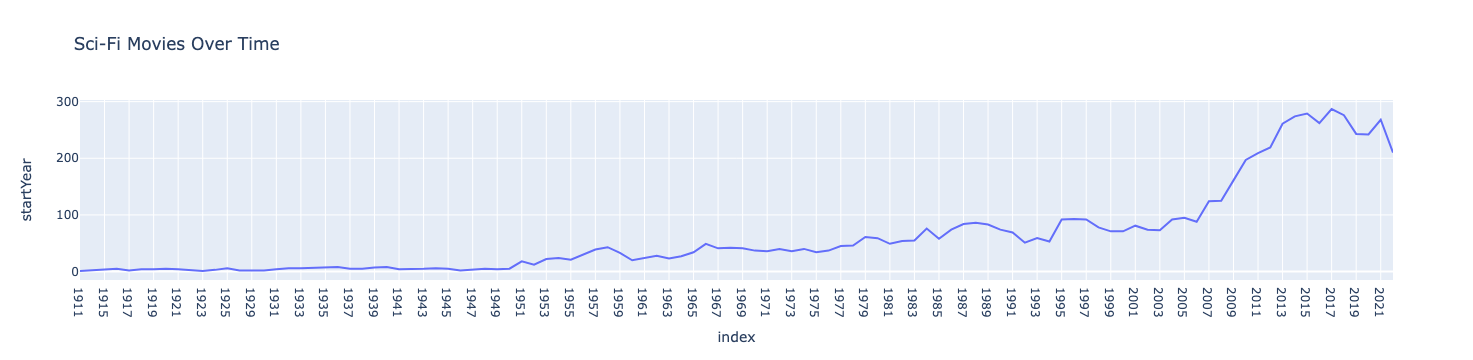

In [59]:
chartdata = scifi_movies.startYear.value_counts().sort_index().reset_index()[:-1]
px.line(chartdata, x="index", y="startYear", title='Sci-Fi Movies Over Time')

In [61]:
scifi_movies['score'] = scifi_movies.averageRating * scifi_movies.numVotes

In [62]:
scifi_movies.sort_values('score')

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score
tconst,,,,,,,,,,,
tt20191094,movie,Deadly Parasite,Deadly Parasite,0,2022,\N,\N,Sci-Fi,2.1,8.0,16.8
tt16424722,movie,The Revenge of Plant,The Revenge of Plant,0,2018,\N,\N,"Fantasy,Romance,Sci-Fi",3.4,5.0,17.0
tt9586350,movie,The Empty Space,The Empty Space,0,2020,\N,78,"Horror,Sci-Fi",3.6,5.0,18.0
tt12010752,movie,Beyond Metal,Beyond Metal,0,2016,\N,84,Sci-Fi,3.8,5.0,19.0
tt13839382,movie,Night of the Falling Stars,Night of the Falling Stars,0,2021,\N,\N,Sci-Fi,2.8,7.0,19.6
...,...,...,...,...,...,...,...,...,...,...,...
tt0848228,movie,The Avengers,The Avengers,0,2012,\N,143,"Action,Adventure,Sci-Fi",8.0,1394907.0,11159256.0
tt0482571,movie,The Prestige,The Prestige,0,2006,\N,130,"Drama,Mystery,Sci-Fi",8.5,1337392.0,11367832.0
tt0816692,movie,Interstellar,Interstellar,0,2014,\N,169,"Adventure,Drama,Sci-Fi",8.6,1838924.0,15814746.4


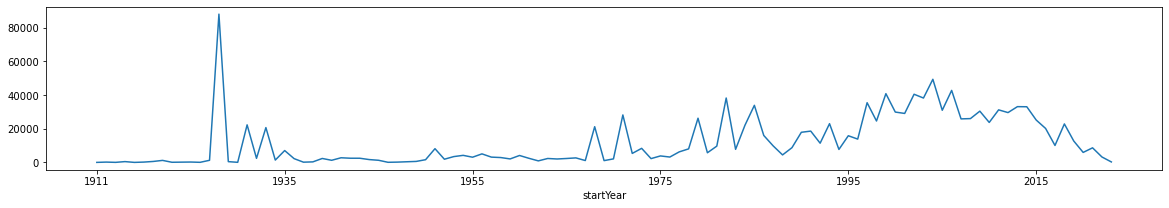

In [65]:
chartdata = scifi_movies.groupby('startYear').numVotes.mean().plot()
# px.line(chartdata, x="index", y="startYear", title='Sci-Fi Movies Over Time')

In [69]:
scifi_movies.groupby('startYear').numVotes.mean().head(25)

startYear
1911       21.000000
1913      193.000000
1915       37.666667
1916      480.000000
1917       19.500000
1918      196.750000
1919      569.750000
1920     1202.600000
1921       90.750000
1922      164.000000
1923      228.000000
1924       59.333333
1925     1257.000000
1927    88034.500000
1929      461.000000
1930       62.500000
1931    22299.250000
1932     2422.000000
1933    20678.166667
1934     1390.714286
1935     7048.125000
1936     2255.750000
1937      145.200000
1938      322.200000
1939     2348.142857
Name: numVotes, dtype: float64

In [71]:
scifi_movies.loc[scifi_movies.startYear == '1927']

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score
tconst,,,,,,,,,,,
tt0017136,movie,Metropolis,Metropolis,0,1927,\N,153,"Drama,Sci-Fi",8.3,175950.0,1460385.0
tt0018584,movie,The Wizard,The Wizard,0,1927,\N,60,"Horror,Mystery,Sci-Fi",7.2,119.0,856.8


<AxesSubplot:xlabel='startYear'>

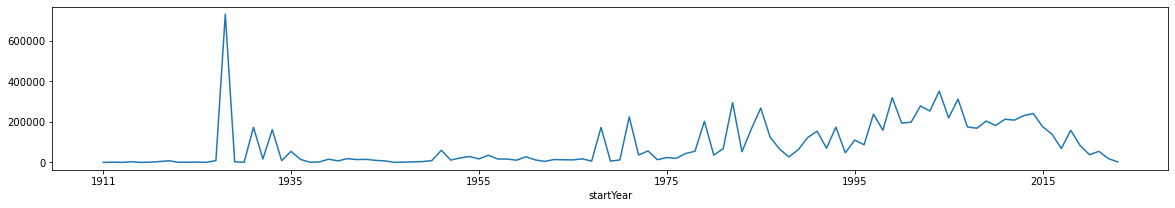

In [72]:
scifi_movies.groupby('startYear').score.mean().plot()

<AxesSubplot:xlabel='startYear'>

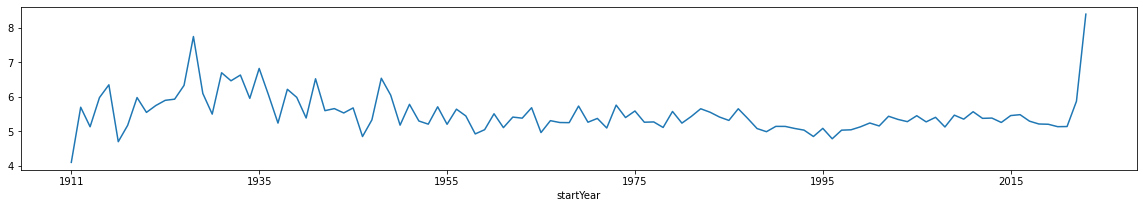

In [73]:
scifi_movies.groupby('startYear').averageRating.mean().plot()

In [74]:
scifi_movies.groupby('startYear').averageRating.mean()

startYear
1911    4.100000
1913    5.700000
1915    5.133333
1916    5.980000
1917    6.350000
          ...   
2019    5.205761
2020    5.135950
2021    5.139925
2022    5.872857
2023    8.400000
Name: averageRating, Length: 109, dtype: float64

In [75]:
scifi_movies.loc[scifi_movies.startYear == '2023']

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score
tconst,,,,,,,,,,,
tt10597418,movie,Parallax,Parallax,0,2023,\N,\N,"Sci-Fi,Thriller",7.2,6.0,43.2
tt14061002,movie,City Rush 3,City Rush 3,0,2023,\N,54,"Action,Crime,Sci-Fi",9.2,13.0,119.6
tt24074470,movie,Cocktail,Cocktail,0,2023,\N,130,"Fantasy,Sci-Fi,Thriller",8.8,837.0,7365.6


In [85]:
cmp = scifi_movies.groupby('startYear')[['averageRating', 'numVotes']].std().fillna(1)
# scifi_movies['score'] = 
cmp.averageRating * cmp.numVotes

startYear
1911        1.000000
1913        8.400000
1915       31.345299
1916      607.724062
1917        0.150000
            ...     
2019    92167.770020
2020    59443.184627
2021    84677.114519
2022    31531.954976
2023      505.624419
Length: 109, dtype: float64

In [89]:
def compute_score(grp):
    
    rtg_std = (grp.averageRating - grp.averageRating.mean()) / grp.averageRating.std()
    vote_std = (grp.numVotes - grp.numVotes.mean()) / grp.numVotes.std()
    
    grp['rtg_std'] = rtg_std
    grp['vote_std'] = vote_std
    
    return grp

scifi_movies = scifi_movies.groupby('startYear').apply(compute_score)

In [90]:
scifi_movies['score'] = scifi_movies.rtg_std * scifi_movies.vote_std

In [92]:
scifi_movies.loc[scifi_movies['score'].isnull()]

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
tconst,,,,,,,,,,,,,
tt0001993,movie,L'électrocuté,L'électrocuté,0,1911,\N,\N,Sci-Fi,4.1,21.0,NaN,NaN,NaN
tt0014721,movie,Black Oxen,Black Oxen,0,1923,\N,80,"Drama,Romance,Sci-Fi",5.9,228.0,NaN,NaN,NaN
tt0018996,movie,High Treason,High Treason,0,1929,\N,95,Sci-Fi,6.1,178.0,NaN,NaN,-0.707107
tt0020198,movie,The Mysterious Island,The Mysterious Island,0,1929,\N,95,"Adventure,Romance,Sci-Fi",6.1,744.0,NaN,NaN,0.707107


In [93]:
scifi_movies.loc[scifi_movies.startYear.isin(['1911', '1923', '1929'])]

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
tconst,,,,,,,,,,,,,
tt0001993,movie,L'électrocuté,L'électrocuté,0,1911,\N,\N,Sci-Fi,4.1,21.0,NaN,NaN,NaN
tt0014721,movie,Black Oxen,Black Oxen,0,1923,\N,80,"Drama,Romance,Sci-Fi",5.9,228.0,NaN,NaN,NaN
tt0018996,movie,High Treason,High Treason,0,1929,\N,95,Sci-Fi,6.1,178.0,NaN,NaN,-0.707107
tt0020198,movie,The Mysterious Island,The Mysterious Island,0,1929,\N,95,"Adventure,Romance,Sci-Fi",6.1,744.0,NaN,NaN,0.707107


In [95]:
scifi_movies.rtg_std.fillna(1, inplace=True)

In [96]:
scifi_movies['score'] = scifi_movies.rtg_std * scifi_movies.vote_std

In [97]:
scifi_movies.loc[scifi_movies['score'].isnull()]

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
tconst,,,,,,,,,,,,,
tt0001993,movie,L'électrocuté,L'électrocuté,0,1911,\N,\N,Sci-Fi,4.1,21.0,NaN,1.0,NaN
tt0014721,movie,Black Oxen,Black Oxen,0,1923,\N,80,"Drama,Romance,Sci-Fi",5.9,228.0,NaN,1.0,NaN


In [98]:
scifi_movies['score'].fillna(1, inplace=True)

In [99]:
scifi_movies

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
tconst,,,,,,,,,,,,,
tt0001993,movie,L'électrocuté,L'électrocuté,0,1911,\N,\N,Sci-Fi,4.1,21.0,1.000000,1.000000,NaN
tt0004974,movie,The Black Box,The Black Box,0,1915,\N,195,"Drama,Sci-Fi",2.9,26.0,0.831243,-1.145174,-0.725866
tt0005615,movie,Life Without Soul,Life Without Soul,0,1915,\N,70,"Drama,Horror,Sci-Fi",6.5,56.0,0.799340,0.700778,1.140647
tt0006333,movie,"20,000 Leagues Under the Sea","20,000 Leagues Under the Sea",0,1916,\N,85,"Action,Adventure,Sci-Fi",6.1,1846.0,0.269728,0.153393,1.758409
tt0006820,movie,"Homunculus, 1. Teil","Homunculus, 1. Teil",0,1916,\N,69,"Horror,Sci-Fi",5.9,102.0,0.049759,-0.102262,-0.486588
...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9867616,movie,Almost Human,Almost Human,0,2019,\N,46,"Documentary,Sci-Fi",6.7,267.0,-0.201526,0.948564,-0.212453
tt9874290,movie,Star Trek: Incident at Beta 9,Star Trek: Incident at Beta 9,0,2002,\N,57,Sci-Fi,5.7,8.0,-0.055579,0.171655,-0.323782
tt9890758,movie,Ultraman R/B: Select! The Crystal of Bond,Gekijôban Urutoraman Rûbu: Serekuto! Kizuna no...,0,2019,\N,72,"Action,Sci-Fi",7.5,87.0,-0.313901,1.456416,-0.215530


<AxesSubplot:xlabel='startYear'>

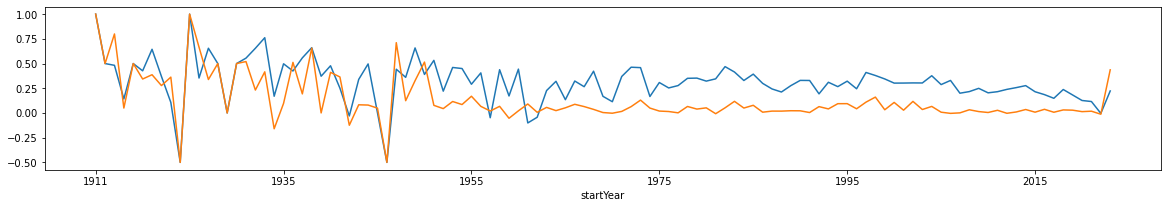

In [102]:
scifi_movies.groupby('startYear').score.mean().plot()
scifi_movies.groupby('startYear').score.median().plot()

In [104]:
def pick_max(grp):
    return grp.sort_values(by='score').tail(1)

top_movies = scifi_movies.groupby('startYear').apply(pick_max)

In [110]:
top_movies.head(60)

,,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
startYear,tconst,,,,,,,,,,,,,
1911,tt0001993,movie,L'électrocuté,L'électrocuté,0,1911,\N,\N,Sci-Fi,4.1,21.0,1.000000,1.000000,NaN
1913,tt0316241,movie,A Message from Mars,A Message from Mars,0,1913,\N,69,"Comedy,Fantasy,Sci-Fi",5.0,187.0,0.500000,-0.707107,-0.707107
1915,tt0004974,movie,The Black Box,The Black Box,0,1915,\N,195,"Drama,Sci-Fi",2.9,26.0,0.831243,-1.145174,-0.725866
1916,tt1365568,movie,L'uomo dall'orecchio mozzato,L'uomo dall'orecchio mozzato,0,1916,\N,\N,Sci-Fi,4.7,16.0,0.977286,-1.636192,-0.597293
1917,tt0008565,movie,She,She,0,1917,\N,50,"Drama,Fantasy,Sci-Fi",6.4,21.0,0.500000,0.707107,0.707107
1918,tt0008100,movie,A Trip to Mars,Himmelskibet,0,1918,\N,97,"Adventure,Fantasy,Sci-Fi",6.4,726.0,1.257210,0.838208,1.499878
1919,tt0010600,movie,The Doll,Die Puppe,0,1919,\N,66,"Comedy,Fantasy,Sci-Fi",7.4,2171.0,1.921696,1.281228,1.499886
1920,tt0011130,movie,Dr. Jekyll and Mr. Hyde,Dr. Jekyll and Mr. Hyde,0,1920,\N,69,"Drama,Horror,Sci-Fi",6.9,5587.0,1.404307,0.785436,1.787933
1921,tt0012456,movie,A Message from Mars,A Message from Mars,0,1921,\N,69,"Comedy,Fantasy,Sci-Fi",4.6,26.0,0.419807,-0.747160,-0.561871


In [112]:
top_movies.tail(60)

,,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
startYear,tconst,,,,,,,,,,,,,
1964,tt0058700,movie,The Last Man on Earth,The Last Man on Earth,0,1964,\N,86,"Drama,Horror,Sci-Fi",6.7,20031.0,4.397124,1.042147,4.219292
1965,tt0058898,movie,Alphaville,Alphaville: Une étrange aventure de Lemmy Caution,0,1965,\N,99,"Drama,Mystery,Sci-Fi",7.0,25909.0,7.794422,1.571147,4.960975
1966,tt0060390,movie,Fahrenheit 451,Fahrenheit 451,0,1966,\N,112,"Drama,Sci-Fi",7.2,43913.0,7.766404,1.370515,5.666780
1967,tt0062168,movie,Quatermass and the Pit,Quatermass and the Pit,0,1967,\N,97,"Horror,Mystery,Sci-Fi",7.0,10651.0,7.227276,1.411466,5.120405
1968,tt0062622,movie,2001: A Space Odyssey,2001: A Space Odyssey,0,1968,\N,149,"Adventure,Sci-Fi",8.3,672493.0,13.749619,2.252343,6.104585
1969,tt0064425,movie,Hibernatus,Hibernatus,0,1969,\N,82,"Comedy,Fantasy,Sci-Fi",6.6,6087.0,2.903543,1.033561,2.809260
1970,tt0065462,movie,Beneath the Planet of the Apes,Beneath the Planet of the Apes,0,1970,\N,95,"Action,Adventure,Sci-Fi",6.0,47891.0,3.242018,0.559793,5.791459
1971,tt0066921,movie,A Clockwork Orange,A Clockwork Orange,0,1971,\N,136,"Crime,Sci-Fi",8.3,833591.0,11.955637,2.058205,5.808770
1972,tt0069293,movie,Solaris,Solyaris,0,1972,\N,167,"Drama,Mystery,Sci-Fi",8.0,92693.0,12.664162,2.307051,5.489328


Planet of the Apes is missing because it was released in 1968, same year as 2001: A Space Odyssey. Bad luck...

In [115]:
scifi_movies.loc[scifi_movies.startYear == '1968'].sort_values('score', ascending=False).head(5)

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
tconst,,,,,,,,,,,,,
tt0062622,movie,2001: A Space Odyssey,2001: A Space Odyssey,0,1968,\N,149,"Adventure,Sci-Fi",8.3,672493.0,13.749619,2.252343,6.104585
tt0063442,movie,Planet of the Apes,Planet of the Apes,0,1968,\N,112,"Adventure,Sci-Fi",8.0,182164.0,3.063522,2.030628,1.508658
tt0063101,movie,How to Make a Doll,How to Make a Doll,0,1968,\N,81,"Comedy,Sci-Fi",2.9,317.0,0.340441,-1.738527,-0.195822
tt0063790,movie,Voyage to the Planet of Prehistoric Women,Voyage to the Planet of Prehistoric Women,0,1968,\N,78,"Adventure,Sci-Fi",2.9,1756.0,0.316992,-1.738527,-0.182334
tt0061529,movie,Creature of Destruction,Creature of Destruction,0,1968,\N,80,"Horror,Sci-Fi",3.2,363.0,0.296371,-1.516812,-0.195390


Star Wars V is missing because it's categorized as "Fantasy" in IMDB, instead of sci-fi. A quick scan of Google and Reddit seems to confirm this.

In [118]:
scifi_movies.loc[scifi_movies.startYear == '1982'].sort_values('score', ascending=False).head(5)

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
tconst,,,,,,,,,,,,,
tt0083658,movie,Blade Runner,Blade Runner,0,1982,\N,117,"Action,Drama,Sci-Fi",8.1,773986.0,10.723566,1.912167,5.608071
tt0084787,movie,The Thing,The Thing,0,1982,\N,109,"Horror,Mystery,Sci-Fi",8.2,428863.0,5.926318,1.990392,2.977463
tt0083866,movie,E.T. the Extra-Terrestrial,E.T. the Extra-Terrestrial,0,1982,\N,115,"Adventure,Family,Sci-Fi",7.9,413756.0,5.025413,1.755717,2.862314
tt0084726,movie,Star Trek II: The Wrath of Khan,Star Trek II: The Wrath of Khan,0,1982,\N,113,"Action,Adventure,Sci-Fi",7.7,123279.0,1.036694,1.599267,0.648231
tt0088134,movie,Slapstick of Another Kind,Slapstick (Of Another Kind),0,1982,\N,82,"Comedy,Fantasy,Sci-Fi",2.5,962.0,0.701276,-2.468433,-0.284098


1982 was another banger year for scifi -- should we have some kind of light clustering to account for this, instead of just picking the top 1 movie per year?

In [127]:
scifi_movies.loc[scifi_movies.startYear == '2016'].sort_values('score', ascending=False).head(5)

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
tconst,,,,,,,,,,,,,
tt3498820,movie,Captain America: Civil War,Captain America: Civil War,0,2016,\N,147,"Action,Adventure,Sci-Fi",7.8,792395.0,11.601541,1.462488,7.932744
tt2543164,movie,Arrival,Arrival,0,2016,\N,116,"Drama,Mystery,Sci-Fi",7.9,700461.0,10.661644,1.525634,6.988337
tt3748528,movie,Rogue One: A Star Wars Story,Rogue One,0,2016,\N,133,"Action,Adventure,Sci-Fi",7.8,643400.0,9.363092,1.462488,6.402168
tt2975590,movie,Batman v Superman: Dawn of Justice,Batman v Superman: Dawn of Justice,0,2016,\N,151,"Action,Adventure,Sci-Fi",6.4,702908.0,4.056870,0.578439,7.013474
tt3385516,movie,X-Men: Apocalypse,X-Men: Apocalypse,0,2016,\N,144,"Action,Adventure,Sci-Fi",6.9,438691.0,3.844274,0.894171,4.299261


Arrival is missing in 2016 because it was overshadowed by Captain America.

In [128]:
scifi_movies.loc[scifi_movies.startYear == '2009'].sort_values('score', ascending=False).head(5)

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
tconst,,,,,,,,,,,,,
tt1136608,movie,District 9,District 9,0,2009,\N,112,"Action,Sci-Fi,Thriller",7.9,685786.0,10.627158,1.690377,6.286857
tt0796366,movie,Star Trek,Star Trek,0,2009,\N,127,"Action,Adventure,Sci-Fi",7.9,606024.0,9.333750,1.690377,5.521697
tt1182345,movie,Moon,Moon,0,2009,\N,97,"Drama,Mystery,Sci-Fi",7.8,361965.0,5.154870,1.620809,3.180430
tt0458525,movie,X-Men Origins: Wolverine,X-Men Origins: Wolverine,0,2009,\N,107,"Action,Sci-Fi",6.5,508782.0,3.287557,0.716423,4.588851
tt0438488,movie,Terminator Salvation,Terminator Salvation,0,2009,\N,115,"Action,Adventure,Sci-Fi",6.5,365062.0,2.299817,0.716423,3.210140


In [129]:
scifi_movies.loc[scifi_movies.startYear == '2012'].sort_values('score', ascending=False).head(5)

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
tconst,,,,,,,,,,,,,
tt0848228,movie,The Avengers,The Avengers,0,2012,\N,143,"Action,Adventure,Sci-Fi",8.0,1394907.0,17.349814,1.781726,9.737644
tt1392170,movie,The Hunger Games,The Hunger Games,0,2012,\N,142,"Action,Adventure,Sci-Fi",7.2,923325.0,7.893085,1.238275,6.374260
tt1276104,movie,Looper,Looper,0,2012,\N,119,"Action,Drama,Sci-Fi",7.4,580105.0,5.395373,1.374138,3.926370
tt0948470,movie,The Amazing Spider-Man,The Amazing Spider-Man,0,2012,\N,136,"Action,Adventure,Sci-Fi",6.9,660359.0,4.653871,1.034481,4.498752
tt1446714,movie,Prometheus,Prometheus,0,2012,\N,124,"Adventure,Mystery,Sci-Fi",7.0,613565.0,4.591558,1.102412,4.165011


In [139]:
scifi_movies.loc[scifi_movies.originalTitle.str.contains('Machina')]

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
tconst,,,,,,,,,,,,,
tt0470752,movie,Ex Machina,Ex Machina,0,2014,\N,108,"Drama,Sci-Fi,Thriller",7.7,549536.0,5.185570,1.559049,3.326110
tt1303782,movie,Ghost from the Machine,Phasma Ex Machina,0,2010,\N,86,"Horror,Sci-Fi",5.6,938.0,-0.020972,0.166275,-0.126128


In [141]:
scifi_movies.loc[scifi_movies.startYear == '2014'].sort_values('score', ascending=False).head(10)

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
tconst,,,,,,,,,,,,,
tt0816692,movie,Interstellar,Interstellar,0,2014,\N,169,"Adventure,Drama,Sci-Fi",8.6,1838924.0,24.813352,2.133644,11.629564
tt1843866,movie,Captain America: The Winter Soldier,Captain America: The Winter Soldier,0,2014,\N,136,"Action,Adventure,Sci-Fi",7.8,850016.0,8.538290,1.622893,5.261154
tt1877832,movie,X-Men: Days of Future Past,X-Men: Days of Future Past,0,2014,\N,132,"Action,Adventure,Sci-Fi",7.9,716096.0,7.419501,1.686737,4.398730
tt1631867,movie,Edge of Tomorrow,Edge of Tomorrow,0,2014,\N,113,"Action,Adventure,Sci-Fi",7.9,683401.0,7.064357,1.686737,4.188180
tt0470752,movie,Ex Machina,Ex Machina,0,2014,\N,108,"Drama,Sci-Fi,Thriller",7.7,549536.0,5.185570,1.559049,3.326110
tt1790864,movie,The Maze Runner,The Maze Runner,0,2014,\N,113,"Action,Mystery,Sci-Fi",6.8,472441.0,2.785642,0.984454,2.829631
tt1872181,movie,The Amazing Spider-Man 2,The Amazing Spider-Man 2,0,2014,\N,142,"Action,Adventure,Sci-Fi",6.6,502229.0,2.588686,0.856766,3.021461
tt1951265,movie,The Hunger Games: Mockingjay - Part 1,The Hunger Games: Mockingjay - Part 1,0,2014,\N,123,"Action,Adventure,Sci-Fi",6.6,459989.0,2.355629,0.856766,2.749442
tt2397535,movie,Predestination,Predestination,0,2014,\N,97,"Action,Drama,Sci-Fi",7.4,285979.0,2.227474,1.367517,1.628845


In [143]:
scifi_movies.loc[scifi_movies.originalTitle.str.contains('Galaxy')]

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
tconst,,,,,,,,,,,,,
tt0177789,movie,Galaxy Quest,Galaxy Quest,0,1999,\N,102,"Adventure,Comedy,Sci-Fi",7.4,165932.0,0.894208,1.635866,0.546626
tt0213673,movie,Galaxy of the Dinosaurs,Galaxy of the Dinosaurs,0,1992,\N,65,"Adventure,Sci-Fi",1.9,203.0,0.570083,-2.266344,-0.251543
tt0371724,movie,The Hitchhiker's Guide to the Galaxy,The Hitchhiker's Guide to the Galaxy,0,2005,\N,109,"Adventure,Comedy,Sci-Fi",6.7,200584.0,1.204668,0.943055,1.277411
tt0398075,movie,Galaxy Hunter,Galaxy Hunter,0,2004,\N,86,"Romance,Sci-Fi",2.6,190.0,0.547632,-1.714590,-0.319395
tt1198142,movie,Sex Galaxy,Sex Galaxy,0,2008,\N,78,"Comedy,Sci-Fi",3.4,329.0,0.273194,-1.190220,-0.229532
tt3648510,movie,Plastic Galaxy: The Story of Star Wars Toys,Plastic Galaxy: The Story of Star Wars Toys,0,2014,\N,67,"Documentary,History,Sci-Fi",6.4,632.0,-0.152191,0.729079,-0.208744
tt6188002,movie,Galaxy of Horrors,Galaxy of Horrors,0,2017,\N,105,"Horror,Sci-Fi",4.7,829.0,0.054660,-0.382992,-0.142720
tt6769514,movie,Project: Galaxy,Project: Galaxy,0,2018,\N,120,Sci-Fi,2.4,21.0,0.389533,-1.755059,-0.221948
tt8783146,movie,Jurassic Galaxy,Jurassic Galaxy,0,2018,\N,74,"Action,Adventure,Sci-Fi",2.4,795.0,0.376322,-1.755059,-0.214421


In [144]:
scifi_movies.loc[scifi_movies.startYear == '1995'].sort_values('score', ascending=False).head(5)

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
tconst,,,,,,,,,,,,,
tt0114746,movie,12 Monkeys,Twelve Monkeys,0,1995,\N,129,"Mystery,Sci-Fi,Thriller",8.0,621544.0,19.377857,2.234604,8.671717
tt0114898,movie,Waterworld,Waterworld,0,1995,\N,135,"Action,Adventure,Sci-Fi",6.2,198814.0,2.236676,0.853819,2.619614
tt0112682,movie,The City of Lost Children,La cité des enfants perdus,0,1995,\N,112,"Drama,Fantasy,Sci-Fi",7.5,69391.0,1.419206,1.851053,0.766702
tt0114558,movie,Strange Days,Strange Days,0,1995,\N,145,"Crime,Drama,Sci-Fi",7.2,73327.0,1.334104,1.620922,0.823053
tt0113492,movie,Judge Dredd,Judge Dredd,0,1995,\N,96,"Action,Crime,Sci-Fi",5.6,119705.0,0.585233,0.393557,1.487033


Ghost in the Shell (1995) is missing because it seems to be just straight-up miscategorized in IMDB. Same with Wall-E.

In [146]:
scifi_movies.loc[scifi_movies.startYear == '2008'].sort_values('score', ascending=False).head(10)

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
tconst,,,,,,,,,,,,,
tt0371746,movie,Iron Man,Iron Man,0,2008,\N,126,"Action,Adventure,Sci-Fi",7.9,1063114.0,17.709634,1.910746,9.268437
tt0800080,movie,The Incredible Hulk,The Incredible Hulk,0,2008,\N,112,"Action,Adventure,Sci-Fi",6.6,496220.0,4.264842,1.014912,4.202180
tt0489099,movie,Jumper,Jumper,0,2008,\N,88,"Action,Adventure,Sci-Fi",6.1,309572.0,1.698781,0.670360,2.534132
tt0452608,movie,Death Race,Death Race,0,2008,\N,105,"Action,Sci-Fi,Thriller",6.4,211117.0,1.450930,0.877091,1.654252
tt1131742,movie,Mutants,Mutants,0,2008,\N,83,"Action,Horror,Sci-Fi",2.3,624.0,0.442046,-1.948234,-0.226896
tt1370282,movie,Salvaging Outer Space,Salvaging Outer Space,0,2008,\N,78,Sci-Fi,2.5,12.0,0.420677,-1.810413,-0.232365
tt0984229,movie,Slices,Slices,0,2008,\N,108,"Horror,Sci-Fi",2.5,317.0,0.415742,-1.810413,-0.229639
tt1235433,movie,Hunting Grounds,Hunting Grounds,0,2008,\N,90,"Horror,Sci-Fi",2.6,346.0,0.399466,-1.741503,-0.229380
tt1194423,movie,Dark Reprieve,Dark Reprieve,0,2008,\N,80,"Mystery,Sci-Fi,Thriller",2.7,426.0,0.382464,-1.672592,-0.228665


In [147]:
scifi_movies.loc[scifi_movies.startYear == '1986'].sort_values('score', ascending=False).head(10)

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
tconst,,,,,,,,,,,,,
tt0090605,movie,Aliens,Aliens,0,1986,\N,137,"Action,Adventure,Sci-Fi",8.4,721136.0,17.232375,2.108555,8.172600
tt0091064,movie,The Fly,The Fly,0,1986,\N,96,"Drama,Horror,Sci-Fi",7.6,186135.0,2.945906,1.493949,1.971892
tt0091949,movie,Short Circuit,Short Circuit,0,1986,\N,98,"Comedy,Family,Sci-Fi",6.6,63091.0,0.396083,0.725692,0.545801
tt0089930,movie,Roller Blade,Roller Blade,0,1986,\N,88,"Action,Comedy,Sci-Fi",3.2,498.0,0.338902,-1.886383,-0.179657
tt0092006,movie,Star Crystal,Star Crystal,0,1986,\N,91,"Horror,Sci-Fi,Thriller",3.5,1148.0,0.285020,-1.655906,-0.172123
tt0190520,movie,Land of Doom,Land of Doom,0,1986,\N,87,"Action,Adventure,Sci-Fi",3.6,687.0,0.280234,-1.579080,-0.177466
tt0091154,movie,Gröna gubbar från Y.R.,Gröna gubbar från Y.R.,0,1986,\N,85,"Family,Sci-Fi",3.7,133.0,0.276246,-1.502255,-0.183887
tt0094274,movie,The Visitants,The Visitants,0,1986,\N,92,"Comedy,Sci-Fi",3.7,245.0,0.274296,-1.502255,-0.182589
tt0091631,movie,Nightmare Weekend,Nightmare Weekend,0,1986,\N,88,"Horror,Sci-Fi",3.6,1038.0,0.273810,-1.579080,-0.173398


In [148]:
scifi_movies.loc[scifi_movies.startYear == '2009'].sort_values('score', ascending=False).head(10)

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
tconst,,,,,,,,,,,,,
tt1136608,movie,District 9,District 9,0,2009,\N,112,"Action,Sci-Fi,Thriller",7.9,685786.0,10.627158,1.690377,6.286857
tt0796366,movie,Star Trek,Star Trek,0,2009,\N,127,"Action,Adventure,Sci-Fi",7.9,606024.0,9.333750,1.690377,5.521697
tt1182345,movie,Moon,Moon,0,2009,\N,97,"Drama,Mystery,Sci-Fi",7.8,361965.0,5.154870,1.620809,3.180430
tt0458525,movie,X-Men Origins: Wolverine,X-Men Origins: Wolverine,0,2009,\N,107,"Action,Sci-Fi",6.5,508782.0,3.287557,0.716423,4.588851
tt0438488,movie,Terminator Salvation,Terminator Salvation,0,2009,\N,115,"Action,Adventure,Sci-Fi",6.5,365062.0,2.299817,0.716423,3.210140
tt1055369,movie,Transformers: Revenge of the Fallen,Transformers: Revenge of the Fallen,0,2009,\N,149,"Action,Adventure,Sci-Fi",5.9,410103.0,1.089073,0.299014,3.642220
tt0448011,movie,Knowing,Knowing,0,2009,\N,121,"Action,Mystery,Sci-Fi",6.2,236662.0,1.004466,0.507718,1.978394
tt1187064,movie,Triangle,Triangle,0,2009,\N,99,"Fantasy,Mystery,Sci-Fi",6.9,118549.0,0.840848,0.994695,0.845332
tt0986263,movie,Surrogates,Surrogates,0,2009,\N,89,"Action,Sci-Fi,Thriller",6.3,176376.0,0.808240,0.577286,1.400068


In [149]:
scifi_movies.loc[scifi_movies.startYear == '2022'].sort_values('score', ascending=False).head(10)

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
tconst,,,,,,,,,,,,,
tt10954984,movie,Nope,Nope,0,2022,\N,130,"Horror,Mystery,Sci-Fi",6.9,188829.0,6.045998,0.593924,10.179750
tt20191094,movie,Deadly Parasite,Deadly Parasite,0,2022,\N,\N,Sci-Fi,2.1,8.0,0.384883,-2.181576,-0.176424
tt7529298,movie,Attack,Attack,0,2022,\N,121,"Action,Sci-Fi,Thriller",6.8,15798.0,0.369697,0.536101,0.689602
tt14096132,movie,Sharkula,Sharkula,0,2022,\N,71,"Action,Horror,Sci-Fi",2.0,244.0,0.366098,-2.239399,-0.163480
tt13156334,movie,Prototype,Prototype,0,2022,\N,87,Sci-Fi,2.1,222.0,0.359278,-2.181576,-0.164687
tt14668358,movie,Alien Sniperess,Alien Sniperess,0,2022,\N,94,"Action,Fantasy,Sci-Fi",2.2,181.0,0.354531,-2.123753,-0.166936
tt7909204,movie,Reign of Chaos,Reign of Chaos,0,2022,\N,77,"Action,Sci-Fi",2.0,414.0,0.345218,-2.239399,-0.154157
tt12885770,movie,Project Legion,Project Legion,0,2022,\N,90,"Horror,Sci-Fi,Thriller",2.3,250.0,0.337059,-2.065930,-0.163151
tt15134742,movie,Shockwaves,Shockwaves,0,2022,\N,\N,"Action,Sci-Fi",2.6,29.0,0.331696,-1.892462,-0.175272


In [151]:
top_movies.to_csv('data/top_movies_20210118.csv', index=True)

In [154]:
top_movies['startYear'] = top_movies.startYear.astype(int)

In [158]:
top_movies.loc[top_movies.startYear.between(1911, 1920)]

,,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
startYear,tconst,,,,,,,,,,,,,
1911,tt0001993,movie,L'électrocuté,L'électrocuté,0,1911,\N,\N,Sci-Fi,4.1,21.0,1.000000,1.000000,NaN
1913,tt0316241,movie,A Message from Mars,A Message from Mars,0,1913,\N,69,"Comedy,Fantasy,Sci-Fi",5.0,187.0,0.500000,-0.707107,-0.707107
1915,tt0004974,movie,The Black Box,The Black Box,0,1915,\N,195,"Drama,Sci-Fi",2.9,26.0,0.831243,-1.145174,-0.725866
1916,tt1365568,movie,L'uomo dall'orecchio mozzato,L'uomo dall'orecchio mozzato,0,1916,\N,\N,Sci-Fi,4.7,16.0,0.977286,-1.636192,-0.597293
1917,tt0008565,movie,She,She,0,1917,\N,50,"Drama,Fantasy,Sci-Fi",6.4,21.0,0.500000,0.707107,0.707107
1918,tt0008100,movie,A Trip to Mars,Himmelskibet,0,1918,\N,97,"Adventure,Fantasy,Sci-Fi",6.4,726.0,1.257210,0.838208,1.499878
1919,tt0010600,movie,The Doll,Die Puppe,0,1919,\N,66,"Comedy,Fantasy,Sci-Fi",7.4,2171.0,1.921696,1.281228,1.499886
1920,tt0011130,movie,Dr. Jekyll and Mr. Hyde,Dr. Jekyll and Mr. Hyde,0,1920,\N,69,"Drama,Horror,Sci-Fi",6.9,5587.0,1.404307,0.785436,1.787933


In [159]:
top_movies.loc[top_movies.startYear.between(1921, 1930)]

,,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
startYear,tconst,,,,,,,,,,,,,
1921,tt0012456,movie,A Message from Mars,A Message from Mars,0,1921,\N,69,"Comedy,Fantasy,Sci-Fi",4.6,26.0,0.419807,-0.747160,-0.561871
1922,tt0014391,movie,Radio-Mania,Radio-Mania,0,1922,\N,95,Sci-Fi,6.2,25.0,-0.500000,0.707107,-0.707107
1923,tt0014721,movie,Black Oxen,Black Oxen,0,1923,\N,80,"Drama,Romance,Sci-Fi",5.9,228.0,1.000000,1.000000,NaN
1924,tt0201528,movie,The City Struck by Lightning,La cité foudroyée,0,1924,\N,72,Sci-Fi,5.6,42.0,0.707041,-1.154701,-0.612316
1925,tt0016039,movie,The Lost World,The Lost World,0,1925,\N,110,"Adventure,Fantasy,Sci-Fi",7.0,5396.0,2.240633,1.159347,1.932668
1927,tt0017136,movie,Metropolis,Metropolis,0,1927,\N,153,"Drama,Sci-Fi",8.3,175950.0,0.500000,0.707107,0.707107
1929,tt0020198,movie,The Mysterious Island,The Mysterious Island,0,1929,\N,95,"Adventure,Romance,Sci-Fi",6.1,744.0,0.707107,1.000000,0.707107
1930,tt0021050,movie,The Last Hour,The Last Hour,0,1930,\N,77,"Comedy,Crime,Sci-Fi",4.7,19.0,0.500000,-0.707107,-0.707107


In [160]:
top_movies.loc[top_movies.startYear.between(1931, 1940)]

,,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
startYear,tconst,,,,,,,,,,,,,
1931,tt0021884,movie,Frankenstein,Frankenstein,0,1931,\N,70,"Drama,Horror,Sci-Fi",7.8,74463.0,1.347297,0.914552,1.473177
1932,tt0024188,movie,Island of Lost Souls,Island of Lost Souls,0,1932,\N,70,"Film-Noir,Horror,Sci-Fi",7.4,9877.0,3.448039,1.793987,1.921998
1933,tt0024216,movie,King Kong,King Kong,0,1933,\N,100,"Adventure,Horror,Sci-Fi",7.9,86669.0,2.637112,1.417358,1.860583
1934,tt0025919,movie,Twentieth Century,Twentieth Century,0,1934,\N,91,"Comedy,Romance,Sci-Fi",7.3,6720.0,2.473298,1.170497,2.113032
1935,tt0026138,movie,The Bride of Frankenstein,Bride of Frankenstein,0,1935,\N,75,"Drama,Horror,Sci-Fi",7.8,49744.0,3.328974,1.353011,2.460418
1936,tt0028358,movie,Things to Come,Things to Come,0,1936,\N,100,"Drama,Sci-Fi,War",6.6,8347.0,1.149975,0.547658,2.099805
1937,tt0028632,movie,Skeleton on Horseback,Bílá nemoc,0,1937,\N,103,"Drama,Fantasy,Sci-Fi",7.5,338.0,2.392854,1.552907,1.540887
1938,tt0030141,movie,Flight to Fame,Flight to Fame,0,1938,\N,67,"Action,Drama,Sci-Fi",5.1,19.0,1.612899,-1.425855,-1.131180
1939,tt0031951,movie,Son of Frankenstein,Son of Frankenstein,0,1939,\N,99,"Drama,Horror,Sci-Fi",7.1,10794.0,1.947680,0.881445,2.209645


In [161]:
top_movies.loc[top_movies.startYear.between(1941, 1950)]

,,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
startYear,tconst,,,,,,,,,,,,,
1941,tt0033553,movie,Dr. Jekyll and Mr. Hyde,Dr. Jekyll and Mr. Hyde,0,1941,\N,113,"Drama,Horror,Sci-Fi",6.8,9251.0,0.926586,0.621426,1.491065
1942,tt0034786,movie,The Ghost of Frankenstein,The Ghost of Frankenstein,0,1942,\N,67,"Drama,Horror,Sci-Fi",6.1,6548.0,0.810136,0.618590,1.309651
1943,tt0035899,movie,Frankenstein Meets the Wolf Man,Frankenstein Meets the Wolf Man,0,1943,\N,74,"Fantasy,Horror,Sci-Fi",6.4,9245.0,1.670430,0.941320,1.774561
1944,tt0036931,movie,House of Frankenstein,House of Frankenstein,0,1944,\N,71,"Fantasy,Horror,Sci-Fi",6.2,7184.0,2.875059,1.425665,2.016644
1945,tt0389126,movie,O Louco,O Louco,0,1945,\N,\N,"Drama,Horror,Sci-Fi",4.8,20.0,0.601764,-1.200869,-0.501108
1946,tt0136798,movie,L'ennemi sans visage,L'ennemi sans visage,0,1946,\N,105,"Crime,Sci-Fi",5.1,33.0,-0.500000,0.707107,-0.707107
1947,tt0039129,movie,Aaj Aur Kal,Aaj Aur Kal,0,1947,\N,\N,"Comedy,Sci-Fi",4.1,16.0,0.836430,-1.153437,-0.725163
1948,tt0040449,movie,Hormoonit valloillaan,Hormoonit valloillaan,0,1948,\N,73,"Comedy,Sci-Fi",5.2,61.0,1.218208,-1.639519,-0.743028
1949,tt0041514,movie,It Happens Every Spring,It Happens Every Spring,0,1949,\N,87,"Comedy,Family,Sci-Fi",6.9,1739.0,1.943419,1.296238,1.499277


In [162]:
top_movies.loc[top_movies.startYear.between(1951, 1960)]

,,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
startYear,tconst,,,,,,,,,,,,,
1951,tt0043456,movie,The Day the Earth Stood Still,The Day the Earth Stood Still,0,1951,\N,92,"Drama,Sci-Fi",7.8,82781.0,6.336854,1.700647,3.726143
1952,tt0044916,movie,Monkey Business,Monkey Business,0,1952,\N,97,"Comedy,Sci-Fi",6.9,14597.0,3.513633,1.125756,3.121132
1953,tt0046534,movie,The War of the Worlds,The War of the Worlds,0,1953,\N,85,"Action,Sci-Fi,Thriller",7.0,36492.0,6.705805,1.609577,4.166192
1954,tt0047034,movie,Godzilla,Gojira,0,1954,\N,96,"Horror,Sci-Fi",7.5,34796.0,4.872608,1.593360,3.058072
1955,tt0048696,movie,Tarantula,Tarantula,0,1955,\N,80,"Horror,Sci-Fi",6.4,10024.0,2.245084,1.125144,1.995375
1956,tt0049366,movie,Invasion of the Body Snatchers,Invasion of the Body Snatchers,0,1956,\N,80,"Drama,Horror,Sci-Fi",7.7,51131.0,5.664064,1.550063,3.654086
1957,tt0050539,movie,The Incredible Shrinking Man,The Incredible Shrinking Man,0,1957,\N,81,"Horror,Sci-Fi",7.6,18569.0,3.786107,1.668578,2.269062
1958,tt0051622,movie,The Fly,The Fly,0,1958,\N,94,"Drama,Horror,Sci-Fi",7.1,23949.0,8.766608,2.208279,3.969882
1959,tt0053137,movie,On the Beach,On the Beach,0,1959,\N,134,"Drama,Romance,Sci-Fi",7.1,13431.0,9.279837,2.058525,4.508002


In [164]:
top_movies.loc[top_movies.startYear.between(1961, 1970)].sort_values('numVotes')

,,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
startYear,tconst,,,,,,,,,,,,,
1962,tt0056331,movie,Panic in Year Zero!,Panic in Year Zero!,0,1962,\N,93,"Action,Horror,Sci-Fi",6.6,4242.0,2.846657,1.309571,2.173732
1969,tt0064425,movie,Hibernatus,Hibernatus,0,1969,\N,82,"Comedy,Fantasy,Sci-Fi",6.6,6087.0,2.903543,1.033561,2.809260
1961,tt0054594,movie,The Absent Minded Professor,The Absent Minded Professor,0,1961,\N,92,"Comedy,Family,Sci-Fi",6.7,8618.0,2.597166,1.249219,2.079032
1967,tt0062168,movie,Quatermass and the Pit,Quatermass and the Pit,0,1967,\N,97,"Horror,Mystery,Sci-Fi",7.0,10651.0,7.227276,1.411466,5.120405
1963,tt0057372,movie,The Nutty Professor,The Nutty Professor,0,1963,\N,107,"Comedy,Romance,Sci-Fi",6.6,18448.0,3.054154,0.795887,3.837420
1964,tt0058700,movie,The Last Man on Earth,The Last Man on Earth,0,1964,\N,86,"Drama,Horror,Sci-Fi",6.7,20031.0,4.397124,1.042147,4.219292
1965,tt0058898,movie,Alphaville,Alphaville: Une étrange aventure de Lemmy Caution,0,1965,\N,99,"Drama,Mystery,Sci-Fi",7.0,25909.0,7.794422,1.571147,4.960975
1966,tt0060390,movie,Fahrenheit 451,Fahrenheit 451,0,1966,\N,112,"Drama,Sci-Fi",7.2,43913.0,7.766404,1.370515,5.666780
1970,tt0065462,movie,Beneath the Planet of the Apes,Beneath the Planet of the Apes,0,1970,\N,95,"Action,Adventure,Sci-Fi",6.0,47891.0,3.242018,0.559793,5.791459


In [165]:
scifi_movies.loc[scifi_movies.startYear == '1970'].sort_values('score', ascending=False).head(10)

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
tconst,,,,,,,,,,,,,
tt0065462,movie,Beneath the Planet of the Apes,Beneath the Planet of the Apes,0,1970,\N,95,"Action,Adventure,Sci-Fi",6.0,47891.0,3.242018,0.559793,5.791459
tt0064177,movie,Colossus: The Forbin Project,Colossus: The Forbin Project,0,1970,\N,100,"Sci-Fi,Thriller",7.1,9218.0,1.257979,1.397424,0.900212
tt0136134,movie,Electrosex 1975,Electrosex 1975,1,1970,\N,61,"Adult,Sci-Fi",2.8,47.0,0.487461,-1.876953,-0.259709
tt0231419,movie,Dager fra 1000 år,Dager fra 1000 år,0,1970,\N,107,"Drama,Mystery,Sci-Fi",3.5,29.0,0.352086,-1.343915,-0.261985
tt0065470,movie,Bigfoot,Bigfoot,0,1970,\N,84,"Horror,Sci-Fi,Thriller",2.6,930.0,0.300389,-2.029250,-0.148029
tt0063074,movie,Hola... señor Dios,Hola... señor Dios,0,1970,\N,79,"Drama,Sci-Fi",4.1,13.0,0.234182,-0.887025,-0.264009
tt0160847,movie,The Sexterminators,The Sexterminators,0,1970,\N,78,"Action,Sci-Fi",4.1,16.0,0.233846,-0.887025,-0.263629
tt0066268,movie,When Women Had Tails,Quando le donne avevano la coda,0,1970,\N,105,"Comedy,Fantasy,Sci-Fi",3.7,647.0,0.219046,-1.191618,-0.183822
tt0065852,movie,Horror of the Blood Monsters,Horror of the Blood Monsters,0,1970,\N,85,"Adventure,Horror,Sci-Fi",3.1,1079.0,0.212961,-1.648508,-0.129184


In [167]:
top_movies.loc[top_movies.startYear.between(1971, 1980)].sort_values('numVotes')

,,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
startYear,tconst,,,,,,,,,,,,,
1974,tt0069945,movie,Dark Star,Dark Star,0,1974,\N,83,"Comedy,Sci-Fi",6.2,25283.0,3.068599,0.734706,4.176638
1975,tt0073631,movie,Rollerball,Rollerball,0,1975,\N,125,"Action,Sci-Fi,Sport",6.6,25996.0,2.611888,0.957045,2.729117
1976,tt0074812,movie,Logan's Run,Logan's Run,0,1976,\N,119,"Action,Adventure,Sci-Fi",6.8,57620.0,7.121644,1.355641,5.253341
1973,tt0070723,movie,Soylent Green,Soylent Green,0,1973,\N,97,"Crime,Mystery,Sci-Fi",7.0,66354.0,3.946459,1.149635,3.432794
1972,tt0069293,movie,Solaris,Solyaris,0,1972,\N,167,"Drama,Mystery,Sci-Fi",8.0,92693.0,12.664162,2.307051,5.489328
1980,tt0081573,movie,Superman II,Superman II,0,1980,\N,127,"Action,Adventure,Sci-Fi",6.8,108997.0,8.707279,1.402221,6.209632
1978,tt0078346,movie,Superman,Superman,0,1978,\N,143,"Action,Adventure,Sci-Fi",7.4,177256.0,9.768796,1.592435,6.134503
1977,tt0075860,movie,Close Encounters of the Third Kind,Close Encounters of the Third Kind,0,1977,\N,138,"Drama,Sci-Fi",7.6,204477.0,11.707230,1.796180,6.517848
1971,tt0066921,movie,A Clockwork Orange,A Clockwork Orange,0,1971,\N,136,"Crime,Sci-Fi",8.3,833591.0,11.955637,2.058205,5.808770


In [168]:
top_movies.loc[top_movies.startYear.between(1981, 1990)].sort_values('numVotes')

,,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
startYear,tconst,,,,,,,,,,,,,
1983,tt0086567,movie,WarGames,WarGames,0,1983,\N,114,"Action,Drama,Sci-Fi",7.1,102304.0,6.301470,1.414556,4.454733
1988,tt0096256,movie,They Live,They Live,0,1988,\N,94,"Action,Horror,Sci-Fi",7.2,132695.0,12.828524,1.580302,8.117769
1981,tt0082694,movie,The Road Warrior,Mad Max 2,0,1981,\N,96,"Action,Adventure,Sci-Fi",7.6,182930.0,8.709644,1.694053,5.141307
1987,tt0093870,movie,RoboCop,RoboCop,0,1987,\N,102,"Action,Crime,Sci-Fi",7.6,262117.0,10.549047,1.642577,6.422253
1990,tt0099088,movie,Back to the Future Part III,Back to the Future Part III,0,1990,\N,118,"Adventure,Comedy,Sci-Fi",7.4,451336.0,10.530419,1.663681,6.329592
1989,tt0096874,movie,Back to the Future Part II,Back to the Future Part II,0,1989,\N,108,"Adventure,Comedy,Sci-Fi",7.8,537401.0,20.827776,2.326126,8.953848
1986,tt0090605,movie,Aliens,Aliens,0,1986,\N,137,"Action,Adventure,Sci-Fi",8.4,721136.0,17.232375,2.108555,8.172600
1982,tt0083658,movie,Blade Runner,Blade Runner,0,1982,\N,117,"Action,Drama,Sci-Fi",8.1,773986.0,10.723566,1.912167,5.608071
1984,tt0088247,movie,The Terminator,The Terminator,0,1984,\N,107,"Action,Sci-Fi",8.1,869285.0,16.537326,2.012194,8.218553


In [170]:
top_movies.loc[top_movies.startYear.between(1991, 2000)].sort_values('score')

,,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
startYear,tconst,,,,,,,,,,,,,
1992,tt0103644,movie,Alien³,Alien³,0,1992,\N,114,"Action,Horror,Sci-Fi",6.4,303251.0,6.133241,0.936402,6.549794
1998,tt0120591,movie,Armageddon,Armageddon,0,1998,\N,151,"Action,Adventure,Sci-Fi",6.7,429788.0,7.378453,1.277191,5.777092
1997,tt0119116,movie,The Fifth Element,The Fifth Element,0,1997,\N,126,"Action,Adventure,Sci-Fi",7.6,477728.0,7.809755,1.739540,4.489552
2000,tt0120903,movie,X-Men,X-Men,0,2000,\N,104,"Action,Adventure,Sci-Fi",7.3,619439.0,9.814859,1.590746,6.169973
1994,tt0111282,movie,Stargate,Stargate,0,1994,\N,116,"Action,Adventure,Sci-Fi",7.0,193514.0,10.802372,1.685136,6.410384
1996,tt0116629,movie,Independence Day,Independence Day,0,1996,\N,145,"Action,Adventure,Sci-Fi",7.0,578858.0,14.850621,1.729787,8.585230
1993,tt0107290,movie,Jurassic Park,Jurassic Park,0,1993,\N,127,"Action,Adventure,Sci-Fi",8.2,992544.0,16.379450,2.209976,7.411597
1995,tt0114746,movie,12 Monkeys,Twelve Monkeys,0,1995,\N,129,"Mystery,Sci-Fi,Thriller",8.0,621544.0,19.377857,2.234604,8.671717
1999,tt0133093,movie,The Matrix,The Matrix,0,1999,\N,136,"Action,Sci-Fi",8.7,1917652.0,21.098795,2.573113,8.199715


In [171]:
top_movies.loc[top_movies.startYear.between(2001, 2010)].sort_values('score')

,,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
startYear,tconst,,,,,,,,,,,,,
2003,tt0290334,movie,X2: X-Men United,X2,0,2003,\N,134,"Action,Adventure,Sci-Fi",7.4,553943.0,6.599375,1.579806,4.177331
2007,tt0480249,movie,I Am Legend,I Am Legend,0,2007,\N,101,"Action,Drama,Sci-Fi",7.2,763885.0,7.558461,1.134524,6.662229
2002,tt0145487,movie,Spider-Man,Spider-Man,0,2002,\N,121,"Action,Adventure,Sci-Fi",7.4,821958.0,8.033337,1.284760,6.252791
2009,tt1136608,movie,District 9,District 9,0,2009,\N,112,"Action,Sci-Fi,Thriller",7.9,685786.0,10.627158,1.690377,6.286857
2004,tt0338013,movie,Eternal Sunshine of the Spotless Mind,Eternal Sunshine of the Spotless Mind,0,2004,\N,108,"Drama,Romance,Sci-Fi",8.3,1011824.0,12.069430,1.930043,6.253450
2001,tt0246578,movie,Donnie Darko,Donnie Darko,0,2001,\N,113,"Drama,Mystery,Sci-Fi",8.0,805895.0,13.955757,1.909966,7.306810
2006,tt0482571,movie,The Prestige,The Prestige,0,2006,\N,130,"Drama,Mystery,Sci-Fi",8.5,1337392.0,15.930986,2.043596,7.795567
2005,tt0434409,movie,V for Vendetta,V for Vendetta,0,2005,\N,132,"Action,Drama,Sci-Fi",8.2,1125623.0,17.131096,2.078066,8.243770
2008,tt0371746,movie,Iron Man,Iron Man,0,2008,\N,126,"Action,Adventure,Sci-Fi",7.9,1063114.0,17.709634,1.910746,9.268437


In [172]:
top_movies.loc[top_movies.startYear.between(2011, 2020)].sort_values('score')

,,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
startYear,tconst,,,,,,,,,,,,,
2011,tt1270798,movie,X-Men: First Class,X: First Class,0,2011,\N,131,"Action,Adventure,Sci-Fi",7.7,696533.0,7.860274,1.331434,5.903617
2013,tt1454468,movie,Gravity,Gravity,0,2013,\N,91,"Drama,Sci-Fi,Thriller",7.7,829754.0,9.035377,1.445900,6.248966
2019,tt6320628,movie,Spider-Man: Far from Home,Spider-Man: Far from Home,0,2019,\N,129,"Action,Adventure,Sci-Fi",7.4,497354.0,11.538220,1.392935,8.283389
2016,tt3498820,movie,Captain America: Civil War,Captain America: Civil War,0,2016,\N,147,"Action,Adventure,Sci-Fi",7.8,792395.0,11.601541,1.462488,7.932744
2015,tt1392190,movie,Mad Max: Fury Road,Mad Max: Fury Road,0,2015,\N,120,"Action,Adventure,Sci-Fi",8.1,1007087.0,14.244936,1.763774,8.076394
2012,tt0848228,movie,The Avengers,The Avengers,0,2012,\N,143,"Action,Adventure,Sci-Fi",8.0,1394907.0,17.349814,1.781726,9.737644
2020,tt6723592,movie,Tenet,Tenet,0,2020,\N,150,"Action,Sci-Fi,Thriller",7.3,510284.0,18.360837,1.365838,13.442915
2018,tt4154756,movie,Avengers: Infinity War,Avengers: Infinity War,0,2018,\N,149,"Action,Adventure,Sci-Fi",8.4,1085404.0,20.535629,1.987380,10.333018
2017,tt3315342,movie,Logan,Logan,0,2017,\N,137,"Action,Drama,Sci-Fi",8.1,767422.0,21.075527,1.802524,11.692229


In [173]:
scifi_movies

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
tconst,,,,,,,,,,,,,
tt0001993,movie,L'électrocuté,L'électrocuté,0,1911,\N,\N,Sci-Fi,4.1,21.0,1.000000,1.000000,NaN
tt0004974,movie,The Black Box,The Black Box,0,1915,\N,195,"Drama,Sci-Fi",2.9,26.0,0.831243,-1.145174,-0.725866
tt0005615,movie,Life Without Soul,Life Without Soul,0,1915,\N,70,"Drama,Horror,Sci-Fi",6.5,56.0,0.799340,0.700778,1.140647
tt0006333,movie,"20,000 Leagues Under the Sea","20,000 Leagues Under the Sea",0,1916,\N,85,"Action,Adventure,Sci-Fi",6.1,1846.0,0.269728,0.153393,1.758409
tt0006820,movie,"Homunculus, 1. Teil","Homunculus, 1. Teil",0,1916,\N,69,"Horror,Sci-Fi",5.9,102.0,0.049759,-0.102262,-0.486588
...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9867616,movie,Almost Human,Almost Human,0,2019,\N,46,"Documentary,Sci-Fi",6.7,267.0,-0.201526,0.948564,-0.212453
tt9874290,movie,Star Trek: Incident at Beta 9,Star Trek: Incident at Beta 9,0,2002,\N,57,Sci-Fi,5.7,8.0,-0.055579,0.171655,-0.323782
tt9890758,movie,Ultraman R/B: Select! The Crystal of Bond,Gekijôban Urutoraman Rûbu: Serekuto! Kizuna no...,0,2019,\N,72,"Action,Sci-Fi",7.5,87.0,-0.313901,1.456416,-0.215530


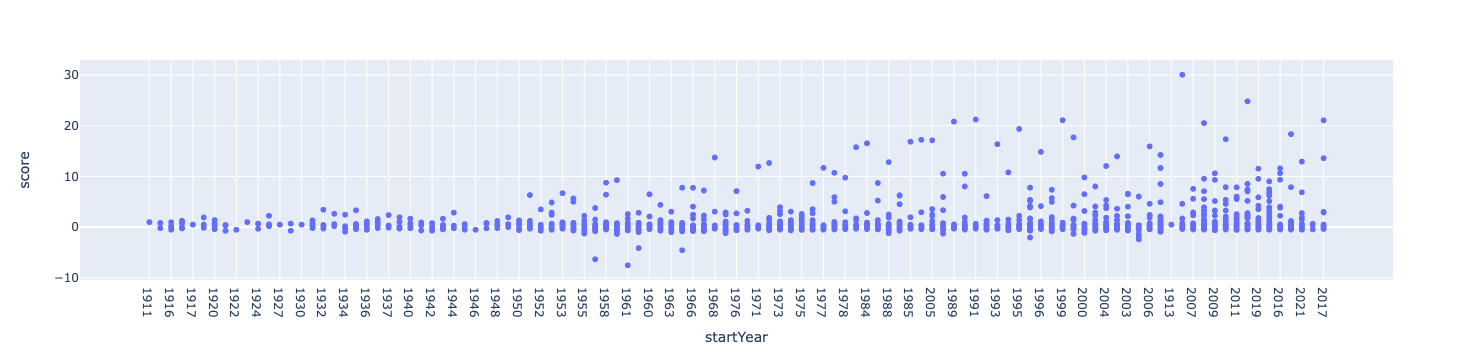

In [175]:
px.scatter(scifi_movies, 'startYear', 'score')

In [177]:
scifi_movies.loc[scifi_movies.startYear == '1927']

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score,rtg_std,vote_std
tconst,,,,,,,,,,,,,
tt0017136,movie,Metropolis,Metropolis,0,1927,\N,153,"Drama,Sci-Fi",8.3,175950.0,0.5,0.707107,0.707107
tt0018584,movie,The Wizard,The Wizard,0,1927,\N,60,"Horror,Mystery,Sci-Fi",7.2,119.0,0.5,-0.707107,-0.707107
